In [1]:
!pip install gpxpy
!pip install tcxreader
!pip install fitdecode

import gpxpy
import pandas as pd
import os
from geopy.distance import geodesic
import numpy as np

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import string
import datetime
from google.colab import drive
import fitdecode
from tcxreader import TCXReader
from pyproj import Transformer
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 5.4 MB/s eta 0:00:00


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

In [3]:
import pandas as pd
import glob
import os

path = '/content/drive/My Drive/Project/Strava/Activities' # use your path
filenames = glob.glob(path + "/*strava.csv")

dfs = [pd.read_csv(filename) for filename in filenames]

all_df = pd.concat(dfs, ignore_index=True)

In [6]:
all_df

,timestamp,lat,lon,heartrate,cadence,elevation,distance,grade_smooth,activity_id,activity_name,activity_type,activity_start,utc_time,power,vertical_ratio,vertical_oscillation,speed
0,0,-6.161919,106.867032,109.0,56.0,7.4,0.0,3.0,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:50:59+00:00,NaN,NaN,NaN,NaN
1,1,-6.161919,106.867055,109.0,59.0,7.4,2.2,2.4,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:51:00+00:00,NaN,NaN,NaN,NaN
2,2,-6.161929,106.867071,109.0,59.0,7.6,4.2,1.9,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:51:01+00:00,NaN,NaN,NaN,NaN
3,3,-6.161940,106.867086,108.0,59.0,7.6,6.6,1.9,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:51:02+00:00,NaN,NaN,NaN,NaN
4,4,-6.161947,106.867104,108.0,59.0,7.6,8.3,0.0,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:51:03+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188365,4101,-6.162194,106.866503,137.0,0.0,6.8,6196.6,13.8,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:41+00:00,NaN,NaN,NaN,NaN
1188366,4102,-6.162199,106.866497,137.0,0.0,6.8,6196.8,7.7,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:42+00:00,NaN,NaN,NaN,NaN
1188367,4103,-6.162201,106.866493,137.0,0.0,6.8,6197.5,0.0,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:43+00:00,NaN,NaN,NaN,NaN
1188368,4104,-6.162195,106.866495,138.0,0.0,7.0,6198.0,0.0,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:44+00:00,NaN,NaN,NaN,NaN


In [10]:
all_df[all_df['distance']>1000]

,timestamp,lat,lon,heartrate,cadence,elevation,distance,grade_smooth,activity_id,activity_name,activity_type,activity_start,utc_time,power,vertical_ratio,vertical_oscillation,speed
479,479,-6.167127,106.873400,140.0,0.0,8.4,1000.4,-1.9,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:58:58+00:00,NaN,NaN,NaN,NaN
480,480,-6.167124,106.873405,139.0,0.0,8.4,1001.5,-3.5,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:58:59+00:00,NaN,NaN,NaN,NaN
481,481,-6.167120,106.873417,139.0,59.0,8.4,1002.6,-6.3,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:59:00+00:00,NaN,NaN,NaN,NaN
482,482,-6.167117,106.873430,139.0,59.0,8.2,1003.7,-5.4,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:59:01+00:00,NaN,NaN,NaN,NaN
483,483,-6.167112,106.873441,139.0,59.0,8.0,1005.1,-5.6,15192028538,Morning Run,Run,2025-07-21T22:50:59Z,2025-07-21 22:59:02+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188365,4101,-6.162194,106.866503,137.0,0.0,6.8,6196.6,13.8,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:41+00:00,NaN,NaN,NaN,NaN
1188366,4102,-6.162199,106.866497,137.0,0.0,6.8,6196.8,7.7,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:42+00:00,NaN,NaN,NaN,NaN
1188367,4103,-6.162201,106.866493,137.0,0.0,6.8,6197.5,0.0,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:43+00:00,NaN,NaN,NaN,NaN
1188368,4104,-6.162195,106.866495,138.0,0.0,7.0,6198.0,0.0,15324563492,Morning Run,Run,2025-08-02T22:56:20Z,2025-08-03 00:04:44+00:00,NaN,NaN,NaN,NaN


## Preprocess the Data

In [11]:
# df = pd.read_csv('/content/batch1_strava.csv')
all_df['utc_time'] = pd.to_datetime(all_df['utc_time'])
geometry = [Point(xy) for xy in zip(all_df['lon'], all_df['lat'])]
gdf_0 = gpd.GeoDataFrame(all_df, geometry=geometry, crs='EPSG:4326')

# Convert to UTM Zone 50S (Indonesia)
gdf = gdf_0.to_crs('EPSG:3857')

# Add X and Y columns
gdf['X'] = gdf.geometry.x
gdf['Y'] = gdf.geometry.y

# Sort and clean
gdf = gdf.sort_values(by='utc_time').reset_index(drop=True)

In [12]:
gdf['geom_after'] = gdf.groupby('activity_id')['geometry'].shift(-1)
gdf['elevation_after'] = gdf.groupby('activity_id')['elevation'].shift(-1)
gdf['distance'] = gdf.geometry.distance(gdf['geom_after'])
gdf['elevation_diff'] = gdf['elevation_after'] - gdf['elevation']

# Assuming you have 'elevation_after' column
gdf['distance_3d'] = np.sqrt((gdf['geom_after'].x - gdf['X'])**2 +
                             (gdf['geom_after'].y - gdf['Y'])**2 +
                             gdf['elevation_diff']**2)

In [13]:
gdf['elevation_gain'] = np.where(gdf['elevation_diff'] > 0, gdf['elevation_diff'], 0)
gdf['elevation_loss'] = np.where(gdf['elevation_diff'] < 0, gdf['elevation_diff'], 0)

gdf['distance_3d (km)'] = gdf['distance_3d'] / 1000

# Convert to GMT+7 from UTC
gdf['utc_time'] = pd.to_datetime(gdf['utc_time']) + pd.Timedelta(hours=7)
gdf = gdf.rename(columns={'utc_time':'time'})
gdf.head()

,timestamp,lat,lon,heartrate,cadence,elevation,distance,grade_smooth,activity_id,activity_name,...,geometry,X,Y,geom_after,elevation_after,elevation_diff,distance_3d,elevation_gain,elevation_loss,distance_3d (km)
0,0,-6.479656,106.704473,NaN,NaN,114.6,1.206492,2.6,3909867821,Jalan dan lari,...,POINT (11878287.6 -722854.496),1.187829e+07,-722854.495567,POINT (11878288.602 -722853.823),114.7,0.1,1.210629,0.1,0.0,0.001211
1,1,-6.479650,106.704482,NaN,NaN,114.7,0.650206,2.2,3909867821,Jalan dan lari,...,POINT (11878288.602 -722853.823),1.187829e+07,-722853.823356,POINT (11878289.158 -722853.487),114.7,0.0,0.650206,0.0,0.0,0.000650
2,3,-6.479647,106.704487,NaN,NaN,114.7,0.704500,3.4,3909867821,Jalan dan lari,...,POINT (11878289.158 -722853.487),1.187829e+07,-722853.487251,POINT (11878289.826 -722853.263),114.7,0.0,0.704500,0.0,0.0,0.000705
3,4,-6.479645,106.704493,NaN,NaN,114.7,0.650206,2.8,3909867821,Jalan dan lari,...,POINT (11878289.826 -722853.263),1.187829e+07,-722853.263180,POINT (11878290.383 -722852.927),114.7,0.0,0.650206,0.0,0.0,0.000650
4,5,-6.479642,106.704498,NaN,NaN,114.7,0.704500,2.3,3909867821,Jalan dan lari,...,POINT (11878290.383 -722852.927),1.187829e+07,-722852.927075,POINT (11878291.051 -722852.703),114.7,0.0,0.704500,0.0,0.0,0.000705


In [21]:
gdf[gdf['time']>'2025-08-03']

,timestamp,lat,lon,heartrate,cadence,elevation,distance,grade_smooth,activity_id,activity_name,...,geometry,X,Y,geom_after,elevation_after,elevation_diff,distance_3d,elevation_gain,elevation_loss,distance_3d (km)
1073992,0,-6.161947,106.866892,98.0,0.0,6.4,3.250496,3.5,15324563492,Morning Run,...,POINT (11896368 -687270.934),1.189637e+07,-687270.934369,POINT (11896370.783 -687269.255),6.4,0.0,3.250496,0.0,0.0,0.003250
1073993,1,-6.161932,106.866917,98.0,0.0,6.4,0.890556,2.9,15324563492,Morning Run,...,POINT (11896370.783 -687269.255),1.189637e+07,-687269.254873,POINT (11896371.674 -687269.255),6.6,0.2,0.912738,0.2,0.0,0.000913
1073994,2,-6.161932,106.866925,97.0,0.0,6.6,1.697101,2.3,15324563492,Morning Run,...,POINT (11896371.674 -687269.255),1.189637e+07,-687269.254873,POINT (11896373.232 -687269.927),6.6,0.0,1.697101,0.0,0.0,0.001697
1073995,3,-6.161938,106.866939,98.0,0.0,6.6,1.026596,1.9,15324563492,Morning Run,...,POINT (11896373.232 -687269.927),1.189637e+07,-687269.926671,POINT (11896374.234 -687270.151),6.6,0.0,1.026596,0.0,0.0,0.001027
1073996,4,-6.161940,106.866948,98.0,83.0,6.6,1.303848,3.8,15324563492,Morning Run,...,POINT (11896374.234 -687270.151),1.189637e+07,-687270.150604,POINT (11896375.459 -687270.598),6.6,0.0,1.303848,0.0,0.0,0.001304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188365,1583,-6.162233,106.866605,139.0,86.0,1.6,2.048312,3.6,16815483431,Morning Run,...,POINT (11896336.051 -687302.957),1.189634e+07,-687302.956762,POINT (11896334.159 -687302.173),1.6,0.0,2.048312,0.0,0.0,0.002048
1188366,1584,-6.162226,106.866588,139.0,86.0,1.6,2.348410,1.8,16815483431,Morning Run,...,POINT (11896334.159 -687302.173),1.189633e+07,-687302.172997,POINT (11896331.821 -687301.949),1.8,0.2,2.356911,0.2,0.0,0.002357
1188367,1585,-6.162224,106.866567,138.0,81.0,1.8,2.340389,2.3,16815483431,Morning Run,...,POINT (11896331.821 -687301.949),1.189633e+07,-687301.949064,POINT (11896329.484 -687302.061),1.8,0.0,2.340389,0.0,0.0,0.002340
1188368,1586,-6.162225,106.866546,138.0,83.0,1.8,1.621549,2.9,16815483431,Morning Run,...,POINT (11896329.484 -687302.061),1.189633e+07,-687302.061030,POINT (11896327.925 -687302.509),1.8,0.0,1.621549,0.0,0.0,0.001622


# Raw Data

## Raw

In [ ]:
raw_data = gdf.copy()

raw_data['Coordinates'] = list(zip(raw_data.lon, raw_data.lat))
raw_data['Coordinates'] = raw_data['Coordinates'].apply(Point)

In [ ]:
# # List to store midpoint info per file
# midpoints = []

# # Group and process each file
# for file, group in raw_data.groupby('activity_id'):
#     first_row = group.iloc[0]
#     last_row = group.iloc[-1]

#     mid_lat = (first_row['lat'] + last_row['lat']) / 2
#     mid_lon = (first_row['lon'] + last_row['lon']) / 2

#     # Store in a dictionary
#     midpoints.append({
#         'activity_id': file,
#         'mid_latitude': mid_lat,
#         'mid_longitude': mid_lon
#     })

# # Convert to DataFrame
# mid_df = pd.DataFrame(midpoints)

# # Initialize Nominatim API with a user agent
# geolocator = Nominatim(user_agent="my_reverse_geocoding_app")

# # Add rate limiting (to avoid timeout errors or being blocked)
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# def reverse_geocode(lat, lon):
#     try:
#         location = reverse((lat, lon), exactly_one=True)
#         if location is None:
#             return pd.Series([None, None])
#         raw = location.raw.get('address', {})
#         city = raw.get('city') or raw.get('town') or raw.get('village') or raw.get('county') or raw.get('district')
#         province = raw.get('state')
#         country = raw.get('country')
#         return pd.Series([city, province, country])
#     except Exception as e:
#         print(f"Reverse geocoding failed for ({lat}, {lon}): {e}")
#         return pd.Series([None, None])

# mid_df[['city', 'province', 'country']] = mid_df.apply(lambda row: reverse_geocode(row['mid_latitude'], row['mid_longitude']), axis=1)

# # Merge midpoint info back to original DataFrame (by 'file')
# df_with_mid = raw_data.merge(mid_df, on='activity_id', how='left')

In [ ]:
# Add key join
raw_data['key_join'] = raw_data['activity_id'].astype(str) + "_" + pd.to_datetime(raw_data['time']).dt.date.astype(str)

# Add next activity time
raw_data['end_time'] = raw_data.groupby('activity_id')['time'].shift(-1)
raw_data = raw_data.rename(columns={'time': 'start_time'})

# Add duration
raw_data['duration(m)'] = (raw_data['end_time'] - raw_data['start_time']).dt.total_seconds() / 60
raw_data['cumulative_duration(m)'] = raw_data.groupby('activity_id')['duration(m)'].cumsum()

raw_data['cumulative_distance(Km)'] = raw_data.groupby('activity_id')['distance_3d (km)'].cumsum()

In [ ]:
raw_data.head()

,timestamp,lat,lon,heartrate,cadence,elevation,distance,grade_smooth,activity_id,activity_name,...,distance_3d,elevation_gain,elevation_loss,distance_3d (km),Coordinates,key_join,end_time,duration(m),cumulative_duration(m),cumulative_distance(Km)
0,0,-6.479656,106.704473,NaN,NaN,114.6,1.206492,2.6,3909867821,Jalan dan lari,...,1.210629,0.1,0.0,0.001211,POINT (106.704473 -6.479656),3909867821_2020-08-14,2020-08-14 08:13:03+00:00,0.016667,0.016667,0.001211
1,1,-6.479650,106.704482,NaN,NaN,114.7,0.650206,2.2,3909867821,Jalan dan lari,...,0.650206,0.0,0.0,0.000650,POINT (106.704482 -6.47965),3909867821_2020-08-14,2020-08-14 08:13:05+00:00,0.033333,0.050000,0.001861
2,3,-6.479647,106.704487,NaN,NaN,114.7,0.704500,3.4,3909867821,Jalan dan lari,...,0.704500,0.0,0.0,0.000705,POINT (106.704487 -6.479647),3909867821_2020-08-14,2020-08-14 08:13:06+00:00,0.016667,0.066667,0.002565
3,4,-6.479645,106.704493,NaN,NaN,114.7,0.650206,2.8,3909867821,Jalan dan lari,...,0.650206,0.0,0.0,0.000650,POINT (106.704493 -6.479645),3909867821_2020-08-14,2020-08-14 08:13:07+00:00,0.016667,0.083333,0.003216
4,5,-6.479642,106.704498,NaN,NaN,114.7,0.704500,2.3,3909867821,Jalan dan lari,...,0.704500,0.0,0.0,0.000705,POINT (106.704498 -6.479642),3909867821_2020-08-14,2020-08-14 08:13:08+00:00,0.016667,0.100000,0.003920


In [ ]:
raw_data.to_csv('/content/drive/My Drive/Project/Strava/Activities/all_raw_data.csv')

In [ ]:
tes = pd.read_csv('/content/drive/My Drive/Project/Strava/Activities/all_raw_data.csv')

In [ ]:
tes['activity_type'].unique()

array(['Walk', 'Run', 'Hike', 'Workout'], dtype=object)

## **Per Segment**

In [ ]:
def point_with_elevation(row):
    """Convert row to 3D Point with elevation."""
    return Point(row['X'], row['Y'], row['elevation'])


def interpolate_point(p1, p2, target_dist, dist_3d):
    """Interpolate a 3D point at a given distance between p1 and p2."""
    ratio = target_dist / dist_3d
    x = p1.x + (p2.x - p1.x) * ratio
    y = p1.y + (p2.y - p1.y) * ratio
    z = p1.z + (p2.z - p1.z) * ratio
    return Point(x, y, z)

def format_pace(row):
    if row['distance_3d'] == 0:
        return None
    pace_min = row['duration(m)'] / (row['distance_3d'] / 1000)
    minutes, seconds = divmod(pace_min * 60, 60)
    return '{:02.0f}:{:02.0f}'.format(minutes, seconds)

def compute_segment_stats(metric_buffer):
    """Compute average, min, max for each metric in buffer."""
    stats = {}
    for key in ['heartrate', 'cadence', 'speed']:
        values = metric_buffer[key]
        stats[f'avg_{key}'] = round(np.mean(values)) if values else None
        stats[f'min_{key}'] = np.min(values) if values else None
        stats[f'max_{key}'] = np.max(values) if values else None
    return stats

def summarize_by_segment_distance(gdf, segment_length=1000):
    gdf['geometry_z'] = gdf.apply(point_with_elevation, axis=1)

    segments, elevations, start_times, end_times, notes = [], [], [], [], []
    stats_list = []
    dist_acc, buffer, note_index = 0, [], 0
    elev_start, time_start = None, None
    note_labels = list(string.ascii_uppercase)
    metric_buffer = {'heartrate': [], 'cadence': [], 'speed': []}

    for i in range(1, len(gdf)):
        prev, curr = gdf.iloc[i - 1], gdf.iloc[i]
        p1, p2 = prev['geometry_z'], curr['geometry_z']
        dist = np.linalg.norm([p2.x - p1.x, p2.y - p1.y, p2.z - p1.z])

        if dist == 0:
            continue

        if not buffer:
            buffer.append(p1)
            elev_start = p1.z
            time_start = prev['time']
            metric_buffer = {k: [] for k in metric_buffer}

        for key in metric_buffer:
            value = curr.get(key)
            if pd.notna(value):
                metric_buffer[key].append(value)

        if dist_acc + dist < segment_length:
            buffer.append(p2)
            dist_acc += dist
        else:
            remain = segment_length - dist_acc
            interp_point = interpolate_point(p1, p2, remain, dist)
            buffer.append(interp_point)

            elev_end = interp_point.z
            segments.append(LineString(buffer))
            elevations.append(elev_end - elev_start)
            start_times.append(time_start)
            end_times.append(curr['time'])
            notes.append(note_labels[note_index % len(note_labels)])
            stats_list.append(compute_segment_stats(metric_buffer))

            note_index += 1
            buffer, dist_acc = [interp_point], 0
            elev_start, time_start = interp_point.z, curr['time']
            metric_buffer = {k: [] for k in metric_buffer}

            leftover_dist = dist - remain
            if leftover_dist > 0:
                gdf.loc[i - 1, 'geometry_z'] = interp_point
                gdf.loc[i - 1, 'elevation'] = interp_point.z
                continue

    # Final segment
    if len(buffer) > 1:
        segments.append(LineString(buffer))
        elevations.append(buffer[-1].z - elev_start)
        start_times.append(time_start)
        end_times.append(gdf.iloc[-1]['time'])
        notes.append(note_labels[note_index % len(note_labels)])
        stats_list.append(compute_segment_stats(metric_buffer))

    # Build GeoDataFrame
    elevation_starts = [line.coords[0][2] for line in segments]
    elevation_ends = [line.coords[-1][2] for line in segments]
    elevation_diffs = [end - start for start, end in zip(elevation_starts, elevation_ends)]
    distances = [segment_length] * (len(segments) - 1) + [segments[-1].length]

    df_stats = pd.DataFrame(stats_list)

    result = gpd.GeoDataFrame({
        'file': gdf['activity_id'].iloc[0],
        'note': notes,
        'distance_3d': distances,
        'elevation_start': elevation_starts,
        'elevation_end': elevation_ends,
        'elevation_diff': elevation_diffs,
        'start_time': start_times,
        'end_time': end_times,
        'geometry': segments
    }, crs=gdf.crs)

    result = pd.concat([result, df_stats], axis=1)
    result['duration(m)'] = (result['end_time'] - result['start_time']).dt.total_seconds() / 60
    result['pace(min)'] = result['duration(m)'] / (result['distance_3d'] / 1000)
    result['pace (minute/km)'] = result.apply(format_pace, axis=1)

    return result

# Function for converting linestring to WGS84
# Example: assuming you have a GeoDataFrame `gdf` with EPSG:3857
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

def convert_linestring_to_wgs84_z(geom):
    if geom.has_z:
        coords_utm = list(geom.coords)
        coords_wgs84 = []
        for x, y, z in coords_utm:
            lon, lat = transformer.transform(x, y)
            coords_wgs84.append((lon, lat, z))
        return LineString(coords_wgs84)
    else:
        raise ValueError("Geometry does not contain Z (3D) coordinates")

In [ ]:
results = []
processed_ids = []

activity_groups = list(gdf.groupby('activity_id'))
total_activities = len(activity_groups)

for i, (activity_id, group) in enumerate(activity_groups, start=1):
    try:
        group_sorted = group.sort_values('time')
        summary = summarize_by_segment_distance(group_sorted)
        summary['activity_id'] = activity_id
        results.append(summary)
        processed_ids.append(activity_id)
        print(f"Processed {i}/{total_activities} activities")
    except Exception as e:
        print(f"❌ Error in {activity_id}: {e}")

print("Finished Processing all activities")
summary_gdf = pd.concat(results, ignore_index=True)

# Apply the transformation
summary_gdf ['geometry_wgs84'] = summary_gdf ['geometry'].apply(convert_linestring_to_wgs84_z)

Processed 1/530 activities
Processed 2/530 activities
Processed 3/530 activities
Processed 4/530 activities
Processed 5/530 activities
Processed 6/530 activities
Processed 7/530 activities
Processed 8/530 activities
Processed 9/530 activities
Processed 10/530 activities
Processed 11/530 activities
Processed 12/530 activities
Processed 13/530 activities
Processed 14/530 activities
Processed 15/530 activities
Processed 16/530 activities
Processed 17/530 activities
Processed 18/530 activities
Processed 19/530 activities
Processed 20/530 activities
Processed 21/530 activities
Processed 22/530 activities
Processed 23/530 activities
Processed 24/530 activities
Processed 25/530 activities
Processed 26/530 activities
Processed 27/530 activities
Processed 28/530 activities
Processed 29/530 activities
Processed 30/530 activities
Processed 31/530 activities
Processed 32/530 activities
Processed 33/530 activities
Processed 34/530 activities
Processed 35/530 activities
Processed 36/530 activities
P

/tmp/ipython-input-501524127.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_gdf = pd.concat(results, ignore_index=True)


In [ ]:
summary_gdf

,file,note,distance_3d,elevation_start,elevation_end,elevation_diff,start_time,end_time,geometry,avg_heartrate,...,min_cadence,max_cadence,avg_speed,min_speed,max_speed,duration(m),pace(min),pace (minute/km),activity_id,geometry_wgs84
0,3.909868e+09,A,1000.000000,114.6,115.4,0.8,2020-08-14 08:13:02+00:00,2020-08-14 08:26:18+00:00,"LINESTRING Z (11878287.6 -722854.496 114.6, 11...",None,...,NaN,NaN,None,None,None,13.266667,13.266667,13:16,3909867821,"LINESTRING Z (106.704 -6.48 114.6, 106.704 -6...."
1,3.909868e+09,B,1000.000000,115.4,123.8,8.4,2020-08-14 08:26:18+00:00,2020-08-14 08:39:34+00:00,"LINESTRING Z (11878955.519 -723006.131 115.4, ...",None,...,NaN,NaN,None,None,None,13.266667,13.266667,13:16,3909867821,"LINESTRING Z (106.71 -6.481 115.4, 106.71 -6.4..."
2,3.909868e+09,C,1000.000000,123.8,120.9,-2.9,2020-08-14 08:39:34+00:00,2020-08-14 08:50:07+00:00,"LINESTRING Z (11879771.6 -722732.838 123.8, 11...",None,...,NaN,NaN,None,None,None,10.550000,10.550000,10:33,3909867821,"LINESTRING Z (106.718 -6.479 123.8, 106.718 -6..."
3,3.909868e+09,D,1000.000000,120.9,115.4,-5.5,2020-08-14 08:50:07+00:00,2020-08-14 08:58:02+00:00,"LINESTRING Z (11878952.757 -722332.944 120.9, ...",None,...,NaN,NaN,None,None,None,7.916667,7.916667,07:55,3909867821,"LINESTRING Z (106.71 -6.475 120.9, 106.71 -6.4..."
4,3.909868e+09,E,750.268732,115.4,105.7,-9.7,2020-08-14 08:58:02+00:00,2020-08-14 09:09:49+00:00,"LINESTRING Z (11878116.213 -722274.528 115.4, ...",None,...,NaN,NaN,None,None,None,11.783333,15.705484,15:42,3909867821,"LINESTRING Z (106.703 -6.474 115.4, 106.703 -6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,1.678066e+10,C,75.363797,3.4,3.0,-0.4,2025-12-19 06:13:21+00:00,NaT,"LINESTRING Z (11896355.593 -687272.454 3.4, 11...",151,...,79.0,88.0,None,None,None,NaN,NaN,nan:nan,16780655378,"LINESTRING Z (106.867 -6.162 3.4, 106.867 -6.1..."
2616,1.681548e+10,A,1000.000000,5.6,5.2,-0.4,2025-12-23 05:59:49+00:00,2025-12-23 06:08:01+00:00,"LINESTRING Z (11896451.156 -687306.316 5.6, 11...",130,...,0.0,87.0,None,None,None,8.200000,8.200000,08:12,16815483431,"LINESTRING Z (106.868 -6.162 5.6, 106.868 -6.1..."
2617,1.681548e+10,B,1000.000000,5.2,2.8,-2.4,2025-12-23 06:08:01+00:00,2025-12-23 06:16:31+00:00,"LINESTRING Z (11897148.285 -687830.895 5.2, 11...",138,...,0.0,89.0,None,None,None,8.500000,8.500000,08:30,16815483431,"LINESTRING Z (106.874 -6.167 5.2, 106.874 -6.1..."
2618,1.681548e+10,C,1000.000000,2.8,1.6,-1.2,2025-12-23 06:16:31+00:00,2025-12-23 06:25:17+00:00,"LINESTRING Z (11897083.251 -687209.287 2.8, 11...",138,...,0.0,87.0,None,None,None,8.766667,8.766667,08:46,16815483431,"LINESTRING Z (106.873 -6.161 2.8, 106.873 -6.1..."


In [ ]:
# def extract_end_latlon(row):
#     coords = row.geometry.coords
#     x, y = coords[-1][:2]  # ignore Z if present
#     point_utm = gpd.GeoDataFrame(geometry=[Point(x, y)], crs="EPSG:3857")
#     point_wgs = point_utm.to_crs("EPSG:4326")
#     lon = point_wgs.geometry[0].x
#     lat = point_wgs.geometry[0].y
#     return pd.Series([lat, lon])

# summary_gdf[['end_lat', 'end_lon']] = summary_gdf.apply(extract_end_latlon, axis=1)

In [ ]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import pandas as pd

# # Initialize Nominatim API with a user agent
# geolocator = Nominatim(user_agent="my_reverse_geocoding_app", timeout=5)  # ⏱️ Increased timeout

# # Add rate limiting (1 request/sec to comply with Nominatim usage policy)
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1, max_retries=2, error_wait_seconds=2.0)

# def reverse_geocode(lat, lon):
#     try:
#         location = reverse((lat, lon), exactly_one=True)
#         if location is None:
#             return pd.Series([None, None, None])
#         raw = location.raw.get('address', {})
#         city = raw.get('city') or raw.get('town') or raw.get('village') or raw.get('county') or raw.get('district')
#         province = raw.get('state')
#         country = raw.get('country')
#         return pd.Series([city, province, country])
#     except Exception as e:
#         print(f"Reverse geocoding failed for ({lat}, {lon}): {e}")
#         return pd.Series([None, None, None])

# # Apply to each row (⚠️ Slow for many rows, consider batching or caching)
# summary_gdf[['city', 'province', 'country']] = summary_gdf.apply(
#     lambda row: reverse_geocode(row['end_lat'], row['end_lon']),
#     axis=1
# )

# # Drop temporary lat/lon columns if no longer needed
# summary_gdf.drop(columns=['end_lat', 'end_lon'], inplace=True)

KeyboardInterrupt: 

In [ ]:
# Add key join
summary_gdf['key_join'] = summary_gdf['activity_id'].astype(str) + "_" + pd.to_datetime(summary_gdf['end_time']).dt.date.astype(str)

# Add elevation and distance
summary_gdf['elevation_gain'] = np.where(summary_gdf['elevation_diff'] > 0, summary_gdf['elevation_diff'], 0)
summary_gdf['elevation_loss'] = np.where(summary_gdf['elevation_diff'] < 0, summary_gdf['elevation_diff'], 0)

summary_gdf['distance_3d (km)'] = summary_gdf['distance_3d'] / 1000
summary_gdf.head()

,file,note,distance_3d,elevation_start,elevation_end,elevation_diff,start_time,end_time,geometry,avg_heartrate,...,max_speed,duration(m),pace(min),pace (minute/km),activity_id,geometry_wgs84,key_join,elevation_gain,elevation_loss,distance_3d (km)
0,3.909868e+09,A,1000.000000,114.6,115.4,0.8,2020-08-14 08:13:02+00:00,2020-08-14 08:26:18+00:00,"LINESTRING Z (11878287.6 -722854.496 114.6, 11...",None,...,None,13.266667,13.266667,13:16,3909867821,"LINESTRING Z (106.704 -6.48 114.6, 106.704 -6....",3909867821_2020-08-14,0.8,0.0,1.000000
1,3.909868e+09,B,1000.000000,115.4,123.8,8.4,2020-08-14 08:26:18+00:00,2020-08-14 08:39:34+00:00,"LINESTRING Z (11878955.519 -723006.131 115.4, ...",None,...,None,13.266667,13.266667,13:16,3909867821,"LINESTRING Z (106.71 -6.481 115.4, 106.71 -6.4...",3909867821_2020-08-14,8.4,0.0,1.000000
2,3.909868e+09,C,1000.000000,123.8,120.9,-2.9,2020-08-14 08:39:34+00:00,2020-08-14 08:50:07+00:00,"LINESTRING Z (11879771.6 -722732.838 123.8, 11...",None,...,None,10.550000,10.550000,10:33,3909867821,"LINESTRING Z (106.718 -6.479 123.8, 106.718 -6...",3909867821_2020-08-14,0.0,-2.9,1.000000
3,3.909868e+09,D,1000.000000,120.9,115.4,-5.5,2020-08-14 08:50:07+00:00,2020-08-14 08:58:02+00:00,"LINESTRING Z (11878952.757 -722332.944 120.9, ...",None,...,None,7.916667,7.916667,07:55,3909867821,"LINESTRING Z (106.71 -6.475 120.9, 106.71 -6.4...",3909867821_2020-08-14,0.0,-5.5,1.000000
4,3.909868e+09,E,750.268732,115.4,105.7,-9.7,2020-08-14 08:58:02+00:00,2020-08-14 09:09:49+00:00,"LINESTRING Z (11878116.213 -722274.528 115.4, ...",None,...,None,11.783333,15.705484,15:42,3909867821,"LINESTRING Z (106.703 -6.474 115.4, 106.703 -6...",3909867821_2020-08-14,0.0,-9.7,0.750269


In [ ]:
summary_gdf.to_csv('/content/drive/My Drive/Project/Strava/all_data_agg.csv')

In [22]:
cek1 = pd.read_csv('/content/drive/My Drive/Project/Strava/all_data_agg.csv')

In [23]:
cek1

,Unnamed: 0,file,note,distance_3d,elevation_start,elevation_end,elevation_diff,start_time,end_time,geometry,...,max_speed,duration(m),pace(min),pace (minute/km),activity_id,geometry_wgs84,key_join,elevation_gain,elevation_loss,distance_3d (km)
0,0,3.909868e+09,A,1000.000000,114.6,115.4,0.8,2020-08-14 08:13:02+00:00,2020-08-14 08:26:18+00:00,LINESTRING Z (11878287.599724608 -722854.49556...,...,NaN,13.266667,13.266667,13:16,3909867821,LINESTRING Z (106.704473 -6.479655999999999 11...,3909867821_2020-08-14,0.8,0.0,1.000000
1,1,3.909868e+09,B,1000.000000,115.4,123.8,8.4,2020-08-14 08:26:18+00:00,2020-08-14 08:39:34+00:00,LINESTRING Z (11878955.519217607 -723006.13121...,...,NaN,13.266667,13.266667,13:16,3909867821,LINESTRING Z (106.71047302289121 -6.4810094628...,3909867821_2020-08-14,8.4,0.0,1.000000
2,2,3.909868e+09,C,1000.000000,123.8,120.9,-2.9,2020-08-14 08:39:34+00:00,2020-08-14 08:50:07+00:00,LINESTRING Z (11879771.599856375 -722732.83813...,...,NaN,10.550000,10.550000,10:33,3909867821,LINESTRING Z (106.71780400000002 -6.4785701128...,3909867821_2020-08-14,0.0,-2.9,1.000000
3,3,3.909868e+09,D,1000.000000,120.9,115.4,-5.5,2020-08-14 08:50:07+00:00,2020-08-14 08:58:02+00:00,LINESTRING Z (11878952.756600102 -722332.94388...,...,NaN,7.916667,7.916667,07:55,3909867821,LINESTRING Z (106.71044820587592 -6.4750007289...,3909867821_2020-08-14,0.0,-5.5,1.000000
4,4,3.909868e+09,E,750.268732,115.4,105.7,-9.7,2020-08-14 08:58:02+00:00,2020-08-14 09:09:49+00:00,LINESTRING Z (11878116.21340325 -722274.528221...,...,NaN,11.783333,15.705484,15:42,3909867821,LINESTRING Z (106.70293341048034 -6.4744793192...,3909867821_2020-08-14,0.0,-9.7,0.750269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2615,1.678066e+10,C,75.363797,3.4,3.0,-0.4,2025-12-19 06:13:21+00:00,NaN,LINESTRING Z (11896355.593438048 -687272.45384...,...,NaN,NaN,NaN,nan:nan,16780655378,LINESTRING Z (106.86678054906159 -6.1619605708...,16780655378_NaT,0.0,-0.4,0.075364
2616,2616,1.681548e+10,A,1000.000000,5.6,5.2,-0.4,2025-12-23 05:59:49+00:00,2025-12-23 06:08:01+00:00,LINESTRING Z (11896451.155759383 -687306.31575...,...,NaN,8.200000,8.200000,08:12,16815483431,LINESTRING Z (106.86763899999998 -6.162263 5.6...,16815483431_2025-12-23,0.0,-0.4,1.000000
2617,2617,1.681548e+10,B,1000.000000,5.2,2.8,-2.4,2025-12-23 06:08:01+00:00,2025-12-23 06:16:31+00:00,LINESTRING Z (11897148.28452076 -687830.894680...,...,NaN,8.500000,8.500000,08:30,16815483431,LINESTRING Z (106.87390141421344 -6.1669481233...,16815483431_2025-12-23,0.0,-2.4,1.000000
2618,2618,1.681548e+10,C,1000.000000,2.8,1.6,-1.2,2025-12-23 06:16:31+00:00,2025-12-23 06:25:17+00:00,LINESTRING Z (11897083.251142211 -687209.28738...,...,NaN,8.766667,8.766667,08:46,16815483431,LINESTRING Z (106.87331720943415 -6.1613964149...,16815483431_2025-12-23,0.0,-1.2,1.000000


## Per File

In [ ]:
def summarize_by_file(gdf):
    """Summarize the entire track as one segment per file."""
    import numpy as np
    from shapely.geometry import LineString, Point
    import pandas as pd
    import geopandas as gpd

    # Convert to 3D geometry
    gdf['geometry_z'] = gdf.apply(point_with_elevation, axis=1)

    # Extract 3D line
    segment = LineString(gdf['geometry_z'].tolist())
    elevation_start = segment.coords[0][2]
    elevation_end = segment.coords[-1][2]
    elevation_diff = elevation_end - elevation_start
    distance_3d = segment.length
    start_time = gdf.iloc[0]['time']
    end_time = gdf.iloc[-1]['time']
    duration_min = (end_time - start_time).total_seconds() / 60

    # Aggregate metrics
    metric_buffer = {'heartrate': [], 'cadence': [], 'speed': []}
    for key in metric_buffer:
        if key in gdf.columns:
            metric_buffer[key] = gdf[key].dropna().tolist()

    stats = compute_segment_stats(metric_buffer)

    # Format pace
    pace = format_pace({
        'distance_3d': distance_3d,
        'duration(m)': duration_min
    })

    # Create GeoDataFrame with one row
    result = gpd.GeoDataFrame([{
        'file': gdf['activity_id'].iloc[0],
        'distance_3d': distance_3d,
        'elevation_start': elevation_start,
        'elevation_end': elevation_end,
        'elevation_diff': elevation_diff,
        'start_time': start_time,
        'end_time': end_time,
        'duration(m)': duration_min,
        'pace (minute/km)': pace,
        'geometry': segment,
        **stats
    }], crs=gdf.crs)

    result['pace(min)'] = result['duration(m)'] / (result['distance_3d'] / 1000)

    return result


In [ ]:
results1 = []
processed_ids1 = []

activity_groups = list(gdf.groupby('activity_id'))
total_activities = len(activity_groups)

for i, (activity_id, group) in enumerate(activity_groups, start=1):
    try:
        group_sorted1 = group.sort_values('time')
        summary1 = summarize_by_file(group_sorted1)
        summary1['activity_id'] = activity_id
        results1.append(summary1)
        processed_ids1.append(activity_id)
        print(f"Processed {i}/{total_activities} activities")
    except Exception as e:
        print(f"❌ Error in {activity_id}: {e}")

print("Finished Processing all activities")
summary_gdf_file = pd.concat(results1, ignore_index=True)

# Apply the transformation
summary_gdf_file ['geometry_wgs84'] = summary_gdf_file ['geometry'].apply(convert_linestring_to_wgs84_z)

Processed 1/530 activities
Processed 2/530 activities
Processed 3/530 activities
Processed 4/530 activities
Processed 5/530 activities
Processed 6/530 activities
Processed 7/530 activities
Processed 8/530 activities
Processed 9/530 activities
Processed 10/530 activities
Processed 11/530 activities
Processed 12/530 activities
Processed 13/530 activities
Processed 14/530 activities
Processed 15/530 activities
Processed 16/530 activities
Processed 17/530 activities
Processed 18/530 activities
Processed 19/530 activities
Processed 20/530 activities
Processed 21/530 activities
Processed 22/530 activities
Processed 23/530 activities
Processed 24/530 activities
Processed 25/530 activities
Processed 26/530 activities
Processed 27/530 activities
Processed 28/530 activities
Processed 29/530 activities
Processed 30/530 activities
Processed 31/530 activities
Processed 32/530 activities
Processed 33/530 activities
Processed 34/530 activities
Processed 35/530 activities
Processed 36/530 activities
P

/tmp/ipython-input-2863695235.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_gdf_file = pd.concat(results1, ignore_index=True)


In [ ]:
def extract_end_latlon(row):
    coords = row.geometry.coords
    x, y = coords[-1][:2]  # ignore Z if present
    point_utm = gpd.GeoDataFrame(geometry=[Point(x, y)], crs="EPSG:3857")
    point_wgs = point_utm.to_crs("EPSG:4326")
    lon = point_wgs.geometry[0].x
    lat = point_wgs.geometry[0].y
    return pd.Series([lat, lon])

summary_gdf_file[['end_lat', 'end_lon']] = summary_gdf_file.apply(extract_end_latlon, axis=1)

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize Nominatim API with a user agent
geolocator = Nominatim(user_agent="my_reverse_geocoding_app")

# Add rate limiting (to avoid timeout errors or being blocked)
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def reverse_geocode(lat, lon):
    try:
        location = reverse((lat, lon), exactly_one=True)
        if location is None:
            return pd.Series([None, None])
        raw = location.raw.get('address', {})
        city = raw.get('city') or raw.get('town') or raw.get('village') or raw.get('county') or raw.get('district')
        province = raw.get('state')
        country = raw.get('country')
        return pd.Series([city, province, country])
    except Exception as e:
        print(f"Reverse geocoding failed for ({lat}, {lon}): {e}")
        return pd.Series([None, None, None])

# Reverse geocode lat/lon to city/province
summary_gdf_file[['city', 'province', 'country']] = summary_gdf_file.apply(lambda row: reverse_geocode(row['end_lat'], row['end_lon']), axis=1)
# Drop the temporary columns after use
summary_gdf_file.drop(columns=['end_lat', 'end_lon'], inplace=True)

In [ ]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import pandas as pd

# # Initialize Nominatim API with a user agent
# geolocator = Nominatim(user_agent="my_reverse_geocoding_app", timeout=5)  # ⏱️ Increased timeout

# # Add rate limiting (1 request/sec to comply with Nominatim usage policy)
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1, max_retries=2, error_wait_seconds=2.0)

# def reverse_geocode(lat, lon):
#     try:
#         location = reverse((lat, lon), exactly_one=True)
#         if location is None:
#             return pd.Series([None, None, None])
#         raw = location.raw.get('address', {})
#         city = raw.get('city') or raw.get('town') or raw.get('village') or raw.get('county') or raw.get('district')
#         province = raw.get('state')
#         country = raw.get('country')
#         return pd.Series([city, province, country])
#     except Exception as e:
#         print(f"Reverse geocoding failed for ({lat}, {lon}): {e}")
#         return pd.Series([None, None, None])

# # Apply to each row (⚠️ Slow for many rows, consider batching or caching)
# summary_gdf_file[['city', 'province', 'country']] = summary_gdf_file.apply(
#     lambda row: reverse_geocode(row['end_lat'], row['end_lon']),
#     axis=1
# )

# # Drop temporary lat/lon columns if no longer needed
# summary_gdf_file.drop(columns=['end_lat', 'end_lon'], inplace=True)

KeyboardInterrupt: 

In [ ]:
# Add key join
summary_gdf_file['key_join'] = summary_gdf_file['file'].astype(str) + "_" + pd.to_datetime(summary_gdf_file['end_time']).dt.date.astype(str)

# Add elevation and distance
summary_gdf_file['elevation_gain'] = np.where(summary_gdf_file['elevation_diff'] > 0, summary_gdf_file['elevation_diff'], 0)
summary_gdf_file['elevation_loss'] = np.where(summary_gdf_file['elevation_diff'] < 0, summary_gdf_file['elevation_diff'], 0)

summary_gdf_file['distance_3d (km)'] = summary_gdf_file['distance_3d'] / 1000
summary_gdf_file.head()

,file,distance_3d,elevation_start,elevation_end,elevation_diff,start_time,end_time,duration(m),pace (minute/km),geometry,...,pace(min),activity_id,geometry_wgs84,city,province,country,key_join,elevation_gain,elevation_loss,distance_3d (km)
0,3909867821,4754.183889,114.6,105.7,-8.9,2020-08-14 08:13:02+00:00,2020-08-14 09:09:49+00:00,56.783333,11:57,"LINESTRING Z (11878287.6 -722854.496 114.6, 11...",...,11.943866,3909867821,"LINESTRING Z (106.704 -6.48 114.6, 106.704 -6....",Kab Bogor,Jawa Barat,Indonesia,3909867821_2020-08-14,0.0,-8.9,4.754184
1,3947290679,6323.418477,106.0,106.0,0.0,2020-08-22 07:05:24+00:00,2020-08-22 08:08:27+00:00,63.050000,09:58,"LINESTRING Z (11877809.149 -721872.964 106, 11...",...,9.970873,3947290679,"LINESTRING Z (106.7 -6.471 106, 106.7 -6.471 1...",Kab Bogor,Jawa Barat,Indonesia,3947290679_2020-08-22,0.0,0.0,6.323418
2,3993854558,2589.564936,105.7,116.1,10.4,2020-09-01 07:37:00+00:00,2020-09-01 08:09:08+00:00,32.133333,12:25,"LINESTRING Z (11877783.1 -721889.769 105.7, 11...",...,12.408777,3993854558,"LINESTRING Z (106.7 -6.471 105.7, 106.7 -6.471...",Kab Bogor,Jawa Barat,Indonesia,3993854558_2020-09-01,10.4,0.0,2.589565
3,4003623311,3961.137211,105.7,105.8,0.1,2020-09-03 07:35:40+00:00,2020-09-03 08:21:24+00:00,45.733333,11:33,"LINESTRING Z (11877778.981 -721889.433 105.7, ...",...,11.545506,4003623311,"LINESTRING Z (106.7 -6.471 105.7, 106.7 -6.471...",Kab Bogor,Jawa Barat,Indonesia,4003623311_2020-09-03,0.1,0.0,3.961137
4,4144684575,3571.336087,787.5,715.5,-72.0,2020-10-03 17:29:38+00:00,2020-10-03 18:03:23+00:00,33.750000,09:27,"LINESTRING Z (11979311.596 -768303.855 787.5, ...",...,9.450245,4144684575,"LINESTRING Z (107.612 -6.885 787.5, 107.612 -6...",Kota Bandung,None,Indonesia,4144684575_2020-10-03,0.0,-72.0,3.571336


In [ ]:
summary_gdf_file[summary_gdf_file['distance_3d (km)']==summary_gdf_file['distance_3d (km)'].max()]

,file,distance_3d,elevation_start,elevation_end,elevation_diff,start_time,end_time,duration(m),pace (minute/km),geometry,...,pace(min),activity_id,geometry_wgs84,city,province,country,key_join,elevation_gain,elevation_loss,distance_3d (km)
453,14948066095,44423.870831,13.8,19.0,5.2,2025-06-29 04:02:51+00:00,2025-06-29 10:28:15+00:00,385.4,08:41,"LINESTRING Z (11891622.116 -688483.095 13.8, 1...",...,8.675516,14948066095,"LINESTRING Z (106.824 -6.173 13.8, 106.824 -6....",Jakarta Pusat,None,Indonesia,14948066095_2025-06-29,5.2,0.0,44.423871


In [ ]:
summary_gdf_file.to_csv('/content/drive/My Drive/Project/Strava/Activities/all_raw_activity_agg.csv')

# Fit Data

In [ ]:
import os
import gzip
# import fitdecode
from fitparse import FitFile
import xml.etree.ElementTree as ET

# Set the directory containing your files
directory = r'/content/drive/My Drive/Project/Strava/fit_file'  # Replace with your actual path

all_data = []

# Loop through files
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # ======== FIT.GZ Files ========
    if filename.endswith('.fit.gz'):
        print(f"Processing FIT: {filename}")
        try:
            with gzip.open(file_path, 'rb') as gz_file:
                fitfile = FitFile(gz_file)
                for record in fitfile.get_messages("record"):
                    data = {field.name: field.value for field in record.fields}
                    data['source_file'] = filename
                    data['activity_type'] = 'fit'
                    all_data.append(data)
        except Exception as e:
            print(f"Error reading {filename}: {e}")

    # ======== GPX Files ========
    elif filename.endswith('.gpx'):
      pass
        # print(f"Processing GPX: {filename}")
        # try:
        #     tree = ET.parse(file_path)
        #     root = tree.getroot()
        #     ns = {'default': 'http://www.topografix.com/GPX/1/1'}

        #     for trkpt in root.findall('.//default:trkpt', ns):
        #         lat = trkpt.attrib.get('lat')
        #         lon = trkpt.attrib.get('lon')
        #         ele = trkpt.find('default:ele', ns)
        #         time = trkpt.find('default:time', ns)

        #         gpx_data = {
        #             'latitude': float(lat) if lat else None,
        #             'longitude': float(lon) if lon else None,
        #             'elevation': float(ele.text) if ele is not None else None,
        #             'timestamp': time.text if time is not None else None,
        #             'source_file': filename,
        #             'activity_type': 'gpx'
        #         }
        #         all_data.append(gpx_data)
        # except Exception as e:
        #     print(f"Error reading {filename}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_data)
print("\n✅ DataFrame created with", len(df), "records")

# Optional: Save to CSV
# df.to_csv("combined_activities.csv", index=False)


Processing FIT: 15103365145.fit.gz
Processing FIT: 15076633154.fit.gz
Processing FIT: 15103364292.fit.gz
Processing FIT: 14993843609.fit.gz
Processing FIT: 15015535416.fit.gz
Processing FIT: 15015534393.fit.gz
Processing FIT: 14993807428.fit.gz
Processing FIT: 14804698647.fit.gz
Processing FIT: 15015535425.fit.gz
Processing FIT: 13515583214.fit.gz
Processing FIT: 13507218493.fit.gz
Processing FIT: 13387970095.fit.gz
Processing FIT: 13404695818.fit.gz
Processing FIT: 13348304090.fit.gz
Processing FIT: 13507218039.fit.gz
Processing FIT: 13472135809.fit.gz
Processing FIT: 13418454269.fit.gz
Processing FIT: 13387969496.fit.gz
Processing FIT: 13299499200.fit.gz
Processing FIT: 13192411708.fit.gz
Processing FIT: 13173469293.fit.gz
Processing FIT: 13139208328.fit.gz
Processing FIT: 13224331662.fit.gz
Processing FIT: 13283054583.fit.gz
Processing FIT: 13254976919.fit.gz
Processing FIT: 13287540742.fit.gz
Processing FIT: 13287540596.fit.gz
Processing FIT: 13210639405.fit.gz
Processing FIT: 1316

In [ ]:
pd.set_option('display.max_columns', None)
df

,timestamp,position_lat,position_long,distance,accumulated_power,enhanced_speed,enhanced_altitude,unknown_140,power,vertical_oscillation,stance_time_percent,stance_time,vertical_ratio,stance_time_balance,step_length,unknown_87,heart_rate,cadence,activity_type,fractional_cadence,unknown_107,unknown_134,unknown_135,unknown_136,unknown_137,unknown_138,unknown_143,source_file,unknown_90,unknown_116,unknown_108
0,2025-04-11 23:14:27,-73863666.0,1.275242e+09,1.30,83.0,1.166,12.2,1167.0,83.0,56.7,NaN,NaN,NaN,NaN,NaN,0.0,99.0,53.0,fit,0.0,0.0,NaN,50.0,99.0,99.0,99.0,70.0,15103365145.fit.gz,NaN,NaN,NaN
1,2025-04-11 23:14:28,-73863501.0,1.275242e+09,2.42,185.0,1.213,12.4,1214.0,102.0,57.1,NaN,NaN,NaN,NaN,NaN,0.0,99.0,53.0,fit,0.0,1.0,NaN,53.0,99.0,99.0,99.0,70.0,15103365145.fit.gz,NaN,NaN,NaN
2,2025-04-11 23:14:29,-73863328.0,1.275242e+09,3.50,298.0,1.213,12.4,1214.0,113.0,57.1,NaN,NaN,NaN,NaN,NaN,0.0,98.0,53.0,fit,0.0,1.0,NaN,55.0,98.0,99.0,99.0,70.0,15103365145.fit.gz,NaN,NaN,NaN
3,2025-04-11 23:14:30,-73863205.0,1.275242e+09,4.82,389.0,1.213,12.4,1214.0,91.0,57.1,NaN,NaN,NaN,NaN,NaN,0.0,99.0,53.0,fit,0.0,1.0,NaN,57.0,99.0,99.0,99.0,70.0,15103365145.fit.gz,NaN,NaN,NaN
4,2025-04-11 23:14:31,-73863039.0,1.275242e+09,6.08,389.0,1.269,12.4,1270.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,99.0,0.0,fit,0.0,1.0,NaN,57.0,99.0,99.0,99.0,70.0,15103365145.fit.gz,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575257,2023-12-09 04:26:10,15452805.0,1.239016e+09,1015.36,NaN,2.921,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,126.0,0.0,fit,0.0,1.0,NaN,7.0,126.0,NaN,NaN,28.0,11082367539.fit.gz,NaN,NaN,NaN
575258,2023-12-09 04:26:12,15452528.0,1.239016e+09,1015.76,NaN,1.474,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,128.0,0.0,fit,0.0,1.0,NaN,13.0,128.0,NaN,NaN,28.0,11082367539.fit.gz,NaN,NaN,NaN
575259,2023-12-09 04:26:14,15452138.0,1.239016e+09,1015.76,NaN,1.465,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,129.0,0.0,fit,0.0,1.0,NaN,16.0,129.0,NaN,NaN,28.0,11082367539.fit.gz,NaN,NaN,NaN
575260,2023-12-09 04:26:16,15451342.0,1.239017e+09,1015.76,NaN,1.465,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,129.0,0.0,fit,0.0,1.0,NaN,16.0,129.0,NaN,NaN,28.0,11082367539.fit.gz,NaN,NaN,NaN


In [ ]:
df1 = df.copy()
df1= df1.rename(columns={'heart_rate':'heartrate', 'speed ':'speed', 'source_file': 'file', 'position_lat': 'latitude', 'position_long': 'longitude', 'enhanced_altitude': 'elevation', 'timestamp': 'time', 'enhanced_speed': 'speed '})
df1['latitude'] = df1['latitude']/10000000
df1['longitude'] = df1['longitude']/10000000
geometry = [Point(xy) for xy in zip(df1['longitude'], df1['latitude'])]
gdf1 = gpd.GeoDataFrame(df1, geometry=geometry, crs='EPSG:4326')

# Convert to UTM Zone 50S (Indonesia)
gdf_utm1 = gdf1.to_crs('EPSG:32750')

# Add X and Y columns
gdf_utm1['X'] = gdf_utm1.geometry.x
gdf_utm1['Y'] = gdf_utm1.geometry.y

# Sort and clean
gdf_utm1 = gdf_utm1.sort_values(by='time').reset_index(drop=True)
gdf_utm1 = gdf_utm1.drop_duplicates(subset=['geometry', 'elevation'])
gdf_utm1 = gdf_utm1[['file', 'latitude', 'longitude', 'elevation', 'time', 'distance', 'heartrate', 'cadence', 'speed ', 'power', 'vertical_ratio', 'vertical_oscillation', 'X', 'Y', 'geometry']]

<Axes: >

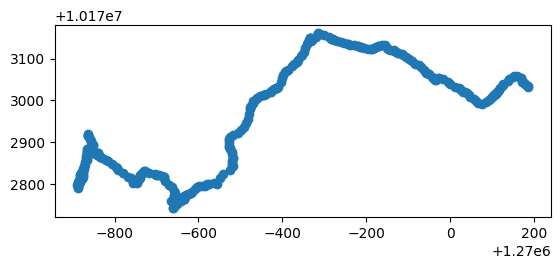

In [ ]:
gdf_utm1[gdf_utm1['file']=='11082367195.fit.gz']['geometry'].plot()

In [ ]:
gdf.head()

,file,latitude,longitude,elevation,time,distance,heartrate,cadence,speed,geometry,X,Y
0,Rinjani (Pos 2-3).tcx,-8.364776,116.465881,1522.2,2023-06-01 02:26:19,0.0,85,None,0.0,POINT (441193.203 9075335.361),441193.203479,9.075335e+06
9,Rinjani (Pos 2-3).tcx,-8.364780,116.465874,1522.3,2023-06-01 02:26:28,4.6,89,None,0.4,POINT (441192.433 9075334.918),441192.433353,9.075335e+06
10,Rinjani (Pos 2-3).tcx,-8.364786,116.465866,1522.4,2023-06-01 02:26:29,5.4,88,None,0.6,POINT (441191.553 9075334.253),441191.553424,9.075334e+06
11,Rinjani (Pos 2-3).tcx,-8.364790,116.465866,1522.4,2023-06-01 02:26:30,6.1,89,None,0.7,POINT (441191.554 9075333.811),441191.554024,9.075334e+06
12,Rinjani (Pos 2-3).tcx,-8.364793,116.465858,1522.5,2023-06-01 02:26:31,6.8,89,None,0.7,POINT (441190.674 9075333.478),441190.673645,9.075333e+06
